# Image To Caption

## Download and load the Dataset (Flickr 30k)

### Install kaggle and dataset

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "anthonnyolime"
os.environ['KAGGLE_KEY'] = "ac663c3e6c759875db943aedda32c95e"
!kaggle datasets download -d hsankesara/flickr-image-dataset

100% 8.16G/8.16G [03:09<00:00, 32.5MB/s]
100% 8.16G/8.16G [03:09<00:00, 46.3MB/s]


In [ ]:
!unzip flickr-image-dataset.zip 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535529555.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356236664.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356318668.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535830521.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5359437945.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361355399.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/53614287.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536147209.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361551308.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536156200.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5362687336.jpg  
  inflating: flickr30k_images/flickr3

### Start variable

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('flickr30k_images/results.csv',sep='|')

In [ ]:
df.head(3)

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .


In [ ]:
df_new =df.rename(columns={' comment':'comment',' comment_number':'comment_number'})

In [ ]:
df_new.at[30,'comment']

' A man sits in a chair while holding a large stuffed animal of a lion .'

In [ ]:
def inspect_datsete(n):
  img =plt.imread('flickr30k_images/flickr30k_images/flickr30k_images/'+df_new.at[n,'image_name'])
  plt.title(df_new.at[n,'comment'])
  plt.imshow(img)

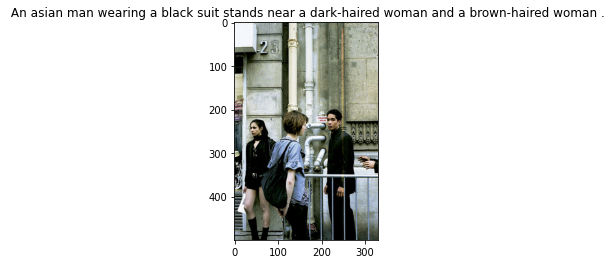

In [ ]:
inspect_datsete(40)

In [ ]:
len(df_new)

158915

## Test model for text generation only

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import keras
import numpy as np
import spacy
import string

In [ ]:
#!python -m spacy download en_core_web_lg

In [ ]:
import en_core_web_sm

nlp = en_core_web_sm.load()
#nlp = spacy.load("en_core_web_lg")
def most_similar_vec(word, count=10):
    by_similarity = sorted(word.vocab, key=lambda w: word.similarity(w), reverse=True)
    return [w.orth_ for w in by_similarity[:count]]

In [ ]:
sentence = df_new['comment']
sentence.fillna(' ')

0          Two young guys with shaggy hair look at their...
1          Two young , White males are outside near many...
2          Two men in green shirts are standing in a yard .
3              A man in a blue shirt standing in a garden .
4                   Two friends enjoy time spent together .
                                ...                        
158910     A man in shorts and a Hawaiian shirt leans ov...
158911     A young man hanging over the side of a boat ,...
158912     A man is leaning off of the side of a blue an...
158913     A man riding a small boat in a harbor , with ...
158914     A man on a moored blue and white boat with hi...
Name: comment, Length: 158915, dtype: object

In [ ]:
#table = str.maketrans('', '', string.punctuation)
dictionary = []
for e in sentence:
  try:
    a = [word.lower() for word in e.strip().split(' ') if word.isalpha()]
    dictionary +=a
  except:
    print(e)

nan


In [ ]:
len(dictionary)

1936064

In [ ]:
dict_set = sorted(set(dictionary))

In [ ]:
len(dict_set)

17912

In [ ]:
dict_set[:10]

['a',
 'aa',
 'aaa',
 'aaron',
 'abandon',
 'abandoned',
 'abarrotes',
 'abbreviated',
 'abc',
 'abdomen']

In [ ]:
''' TRreeees longgggg
count_word= []
for e in dict_set:
  count_word.append((e,dictionary.count(e)))
sort_count_word = sorted(count_word,key= lambda x : x[1],reverse=True)
sort_count_word[:1000]
'''

' TRreeees longgggg\ncount_word= []\nfor e in dict_set:\n  count_word.append((e,dictionary.count(e)))\nsort_count_word = sorted(count_word,key= lambda x : x[1],reverse=True)\nsort_count_word[:1000]\n'

In [ ]:
corrected_sent=[]
for i,e in enumerate(sentence):
  try:
    corrected_sent.append('<start> '+(' '.join([word.lower() for word in e.strip().split(' ') if word.isalpha()]))+' <end>')
    print(e)


nan


In [ ]:
len(corrected_sent)

158914

In [ ]:
#vocab_size = len(dict_set)+2
vocab_size = 5000

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size,oov_token="<unk>",filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n',split=' ', char_level=False)
tokenizer.fit_on_texts(corrected_sent)

In [ ]:
a = tokenizer.texts_to_sequences(corrected_sent)
len(a),int(len(a)/4)

(158914, 39728)

In [ ]:
from functools import reduce

max_length = len(reduce(lambda x,y : x if len(x)>len(y)else y,a))

In [ ]:
x,y = [],[]
count =0
for e in a[:int(len(a)/pow(2,6))] :
  for i,_ in enumerate(e[1:]) :
    x.append(tf.keras.preprocessing.sequence.pad_sequences([e[:i+1]], maxlen=max_length)[0])
    y.append(tf.keras.utils.to_categorical(e[i+1],vocab_size)) 
    count+=1
print(count)
#len(x),len(y)

32614


In [ ]:
len(x),len(y)

(32614, 32614)

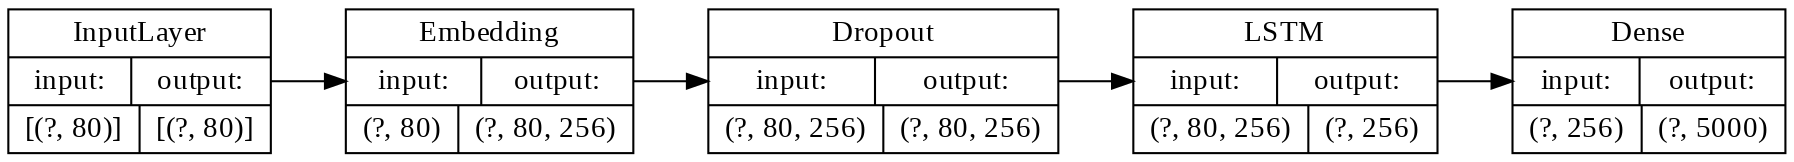

In [ ]:
from tensorflow.keras.layers import Input , LSTM , Embedding,Dense,Dropout
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Model
input = Input(shape=(max_length,))
embedding = Embedding(vocab_size,256,mask_zero=False)(input)
drop = Dropout(0.5)(embedding)
lstm = LSTM(256)(drop)
output = Dense(vocab_size,activation='softmax')(lstm)

model = Model(inputs=input, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
tf.keras.utils.plot_model(model, "my_first_model.png",show_shapes=True,show_layer_names=False,dpi=150,expand_nested=False,rankdir='LR')

In [ ]:
def test_model(batch,_):
  #_could_use_gpu_kernel = False
  intext ='<start>'
  for _ in range(max_length):
    test_seq = tokenizer.texts_to_sequences([intext])
    #print(test_seq)
    pad_test_seq = tf.keras.preprocessing.sequence.pad_sequences([test_seq],maxlen=max_length)[0]
    #print(pad_test_seq)
    res = model.predict(pad_test_seq)
    intext += ' '+tokenizer.index_word[res[-1].argmax()]
    #print([e.argmax() for e in res])
    if tokenizer.index_word[res[-1].argmax()] == '<end>':
        break
  print('\n',intext)

In [ ]:
model.fit(np.array(x),np.array(y),batch_size=64,epochs=20,callbacks=[LambdaCallback(on_epoch_end=test_model)])

Epoch 1/20
510/510 [==============================] - ETA: 0s - loss: 3.8706 - accuracy: 0.2942
 <start> a man in a blue shirt and a man in a blue shirt and a man in a blue shirt and a man in a blue shirt and a man in a blue shirt and a man in a blue shirt and a man in a blue shirt and a man in a blue shirt and a man in a blue shirt and a man in a blue shirt and a man in a blue shirt and a man in
510/510 [==============================] - 15s 30ms/step - loss: 3.8706 - accuracy: 0.2942
Epoch 2/20
509/510 [============================>.] - ETA: 0s - loss: 3.6911 - accuracy: 0.3055
 <start> a man in a white shirt and a white shirt is standing on a table <end>
510/510 [==============================] - 13s 25ms/step - loss: 3.6916 - accuracy: 0.3055
Epoch 3/20
508/510 [============================>.] - ETA: 0s - loss: 3.5420 - accuracy: 0.3167
 <start> a man in a white shirt and a white shirt and a white shirt and a white shirt and a white shirt and a white shirt and a white shirt and a w

In [ ]:
!nvidia-smi

In [ ]:
test_model(None,None)


 <start> a woman in a white shirt and a white shirt standing in front of him <end>


## Actual Model for image captionning (word)

###Preprocessing

####Import

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pickle
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import random

#### Variable

In [ ]:
df_new

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
...,...,...,...
158910,998845445.jpg,0,A man in shorts and a Hawaiian shirt leans ov...
158911,998845445.jpg,1,"A young man hanging over the side of a boat ,..."
158912,998845445.jpg,2,A man is leaning off of the side of a blue an...
158913,998845445.jpg,3,"A man riding a small boat in a harbor , with ..."


In [ ]:
image_dataset = df_new['image_name']
image_dataset

0         1000092795.jpg
1         1000092795.jpg
2         1000092795.jpg
3         1000092795.jpg
4         1000092795.jpg
               ...      
158910     998845445.jpg
158911     998845445.jpg
158912     998845445.jpg
158913     998845445.jpg
158914     998845445.jpg
Name: image_name, Length: 158915, dtype: object

In [ ]:
comment_dataset = df_new['comment']
comment_dataset

0          Two young guys with shaggy hair look at their...
1          Two young , White males are outside near many...
2          Two men in green shirts are standing in a yard .
3              A man in a blue shirt standing in a garden .
4                   Two friends enjoy time spent together .
                                ...                        
158910     A man in shorts and a Hawaiian shirt leans ov...
158911     A young man hanging over the side of a boat ,...
158912     A man is leaning off of the side of a blue an...
158913     A man riding a small boat in a harbor , with ...
158914     A man on a moored blue and white boat with hi...
Name: comment, Length: 158915, dtype: object

In [ ]:
uni_image = image_dataset.unique()

In [ ]:
comment_dataset_train=[]
comment_dataset.replace(np.nan, '', regex=True)
for i,e in enumerate(comment_dataset):
  try:
    comment_dataset_train.append('<start> '+(' '.join([word.lower() for word in e.strip().split(' ') if word.isalpha() ]))+' <end>')
  except:
    print(e, type(e))
    comment_dataset_train.append('<start> '+'nan'+' <end>')
    continue

nan <class 'float'>


In [ ]:
df_new['comment_train'] = comment_dataset_train
df_new

,image_name,comment_number,comment,comment_train
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...,<start> two young guys with shaggy hair look a...
1,1000092795.jpg,1,"Two young , White males are outside near many...",<start> two young white males are outside near...
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .,<start> two men in green shirts are standing i...
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .,<start> man in blue shirt standing in garden <...
4,1000092795.jpg,4,Two friends enjoy time spent together .,<start> two friends enjoy time spent together ...
...,...,...,...,...
158910,998845445.jpg,0,A man in shorts and a Hawaiian shirt leans ov...,<start> man in shorts and hawaiian shirt leans...
158911,998845445.jpg,1,"A young man hanging over the side of a boat ,...",<start> young man hanging over the side of boa...
158912,998845445.jpg,2,A man is leaning off of the side of a blue an...,<start> man is leaning off of the side of blue...
158913,998845445.jpg,3,"A man riding a small boat in a harbor , with ...",<start> man riding small boat in harbor with f...


In [ ]:
vocab_size = 5000

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size,oov_token="<unk>",filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n',split=' ', char_level=False)
tokenizer.fit_on_texts(comment_dataset_train)

In [ ]:
max_length = 80

In [ ]:
vgg = VGG16()
vgg16_extract = Model(inputs=vgg.inputs, outputs=vgg.layers[-2].output)

553467904/553467096 [==============================] - 4s 0us/step


#### Function

In [ ]:
def load_img_from_path(img):
  path = 'flickr30k_images/flickr30k_images/flickr30k_images/'
  img = load_img(path+img,target_size=(224,224))
  im_arr= img_to_array(img)
  im_arr = im_arr.reshape((1, im_arr.shape[0], im_arr.shape[1], im_arr.shape[2]))
  im_arr = preprocess_input(im_arr)
  predict = vgg16_extract.predict(im_arr,verbose=0)
  #print(predict)
  return predict[0]

In [ ]:
def from_comment_to_data(tokenizer,image,sentences,max_length,vocab_size):
  X_image, X_sequence, y = list(), list(), list()
  #print(sentences[0:1])
  for e in sentences:
    sequence = tokenizer.texts_to_sequences([e])
    for i,_ in enumerate(sequence[0][1:]):
      X_image.append(image)
      X_sequence.append(tf.keras.preprocessing.sequence.pad_sequences([sequence[0][:i+1]], maxlen=max_length)[0])
      y.append(tf.keras.utils.to_categorical(sequence[0][i+1],vocab_size))
  return np.array(X_image),np.array(X_sequence),np.array(y)

In [ ]:
def data_generator(df_train,data_image_train,tokenizer,max_length,vocab_size):
  while 1:
    for image in data_image_train:
      sentences = df_train[df_train['image_name'] == image]["comment_train"]
      image_vgg = load_img_from_path(image)
      X_image, X_sequence, y = from_comment_to_data(tokenizer,image_vgg,sentences,max_length,vocab_size)
      yield ((X_sequence,X_image),y)

In [ ]:
def inspect_datset_from_path(img_name):
  #print('flickr30k_images/flickr30k_images/flickr30k_images/'+img_name)
  img =plt.imread('flickr30k_images/flickr30k_images/flickr30k_images/'+img_name)
  print('\n',list(df_new[df_new['image_name'] == img_name]["comment_train"])[0:])
  plt.imshow(img)


In [ ]:
def plot_probability_word(res):
    a = np.argsort(res[-1])[::-1]
    print(a[:10],res[-1][a][:10])
    print(tokenizer.index_word[a[0]])
    plt.figure(figsize=(25,10),dpi=40)
    plt.bar([i for i in range(10)], res[-1][a][:10])
    plt.xticks([i for i in range(10)],[tokenizer.index_word[e] for e in a[:10]],fontsize=30,rotation=30)
    plt.show()

In [ ]:
def test_model(batch,logs):
  image = np.random.choice(uni_image,1)[0]
  intext ='<start>'
  img = load_img_from_path(image)
  image_input = np.array(img).reshape(1,-1)
  inspect_datset_from_path(image)
  for _ in range(10):
    test_seq = tokenizer.texts_to_sequences([intext])
    pad_test_seq = tf.keras.preprocessing.sequence.pad_sequences([test_seq],maxlen=max_length)[0]
    text = np.array(pad_test_seq).reshape(1,-1)
    
    res = model.predict((text,image_input),verbose=0)

    intext += ' '+tokenizer.index_word[res[-1].argmax()]
    #a = np.argsort(res[-1])[::-1]
    #ra = np.random.choice(a,p=res[0])
    #intext +=' '+tokenizer.index_word[ra]
    plot_probability_word(res)
    '''if tokenizer.index_word[ra] == '<end>':
        break'''
    if tokenizer.index_word[res[-1].argmax()] == '<end>':
        break
  print('\n',intext)

In [ ]:
np.random.shuffle(uni_image)
generator = data_generator(df_new,uni_image, tokenizer, max_length, vocab_size)
inputs, outputs= next(generator)
print(inputs[0].shape)
print(inputs[1].shape)
print(outputs.shape)

(64, 80)
(64, 4096)
(64, 5000)


#### Test


 ['<start> a street performer rides a high unicycle in front of a young boy while holding two pins in front of a crowd <end>', '<start> unicyclist rides around a little person to entertain a small crowd of onlookers <end>', '<start> a unicyclist performs on the streets in front of a large crowd <end>', '<start> a street performer in a yellow shirt rides a high unicycle <end>', '<start> a man is performing for a crowd on a tall unicycle <end>']


NameError: ignored

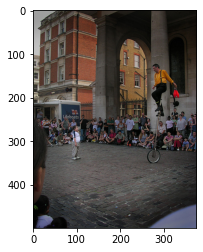

In [ ]:
test_model(None,None)

In [ ]:
#tokenizer.word_index

In [ ]:
num = 6000
print(str(df_new.at[num,'comment_train']))
s= tokenizer.texts_to_sequences([df_new.at[num,'comment_train']])
m = tokenizer.sequences_to_texts(s)
print(m)

In [ ]:
#inspect_datset_from_path(uni_image[0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

###Model

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 80, 256)      1280000     input_4[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 4096)         0           input_5[0][0]                    
_______________________________________________________________________________________

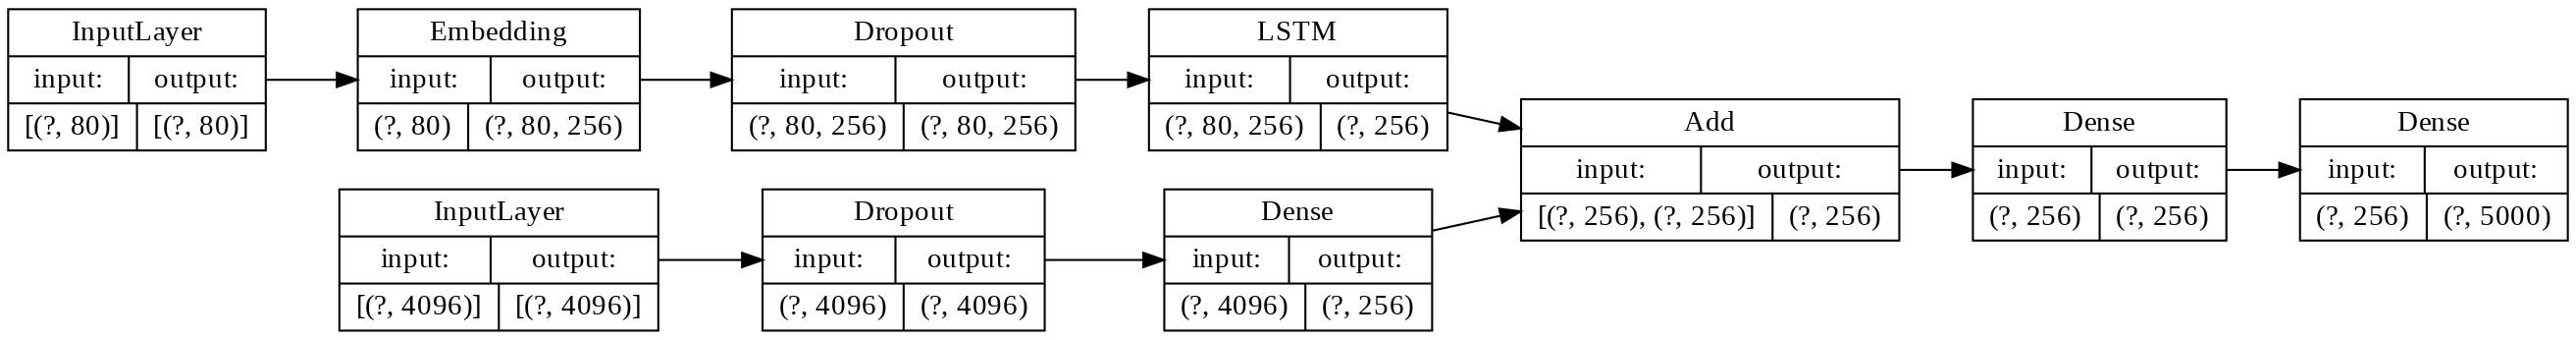

In [ ]:
from tensorflow.keras.layers import Input , LSTM , Embedding,Dense,Dropout,add
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

input1 = Input(shape=(max_length,))
embedding = Embedding(vocab_size,256,mask_zero=False)(input1)
drop = Dropout(0.5)(embedding)
lstm = LSTM(256)(drop)

input2 = Input(shape=(4096,))
drop2 = Dropout(0.5)(input2)
dense = Dense(256, activation='relu')(drop2)

decode = add([dense,lstm])
decode = Dense(256,activation='relu')(decode)

output = Dense(vocab_size,activation='softmax')(decode)

model = Model(inputs=[input1,input2], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()
tf.keras.utils.plot_model(model, "my_first_model.png",show_shapes=True,show_layer_names=False,dpi=150,expand_nested=False,rankdir='LR')

In [ ]:
model.fit(generator,steps_per_epoch=100,epochs = 100,callbacks=[LambdaCallback(on_epoch_end=test_model)])

## Actual Model for image captionning (character)

### Import

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pickle
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import random

### Variable

In [ ]:
df_new

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
...,...,...,...
158910,998845445.jpg,0,A man in shorts and a Hawaiian shirt leans ov...
158911,998845445.jpg,1,"A young man hanging over the side of a boat ,..."
158912,998845445.jpg,2,A man is leaning off of the side of a blue an...
158913,998845445.jpg,3,"A man riding a small boat in a harbor , with ..."


In [ ]:
image_dataset = df_new['image_name']
image_dataset

0         1000092795.jpg
1         1000092795.jpg
2         1000092795.jpg
3         1000092795.jpg
4         1000092795.jpg
               ...      
158910     998845445.jpg
158911     998845445.jpg
158912     998845445.jpg
158913     998845445.jpg
158914     998845445.jpg
Name: image_name, Length: 158915, dtype: object

In [ ]:
comment_dataset = df_new['comment']
comment_dataset

0          Two young guys with shaggy hair look at their...
1          Two young , White males are outside near many...
2          Two men in green shirts are standing in a yard .
3              A man in a blue shirt standing in a garden .
4                   Two friends enjoy time spent together .
                                ...                        
158910     A man in shorts and a Hawaiian shirt leans ov...
158911     A young man hanging over the side of a boat ,...
158912     A man is leaning off of the side of a blue an...
158913     A man riding a small boat in a harbor , with ...
158914     A man on a moored blue and white boat with hi...
Name: comment, Length: 158915, dtype: object

In [ ]:
uni_image = image_dataset.unique()

In [ ]:
comment_dataset_train_character=[]
comment_dataset.replace(np.nan, '', regex=True)
for i,e in enumerate(comment_dataset):
  try:
    comment_dataset_train_character.append('> '+(' '.join([word.lower() for word in e.strip().split(' ') if word.isalpha()]))+' <')
  except:
    print(e, type(e))
    comment_dataset_train_character.append('> '+'nan'+' <')
    continue

nan <class 'float'>


In [ ]:
df_new['comment_train'] = comment_dataset_train_character
df_new

,image_name,comment_number,comment,comment_train
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...,> two young guys with shaggy hair look at thei...
1,1000092795.jpg,1,"Two young , White males are outside near many...",> two young white males are outside near many ...
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .,> two men in green shirts are standing in a ya...
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .,> a man in a blue shirt standing in a garden <
4,1000092795.jpg,4,Two friends enjoy time spent together .,> two friends enjoy time spent together <
...,...,...,...,...
158910,998845445.jpg,0,A man in shorts and a Hawaiian shirt leans ov...,> a man in shorts and a hawaiian shirt leans o...
158911,998845445.jpg,1,"A young man hanging over the side of a boat ,...",> a young man hanging over the side of a boat ...
158912,998845445.jpg,2,A man is leaning off of the side of a blue an...,> a man is leaning off of the side of a blue a...
158913,998845445.jpg,3,"A man riding a small boat in a harbor , with ...",> a man riding a small boat in a harbor with f...


In [ ]:
vocab_size = 31

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size,oov_token="<unk>",filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n',split=' ', char_level=True)
tokenizer.fit_on_texts(comment_dataset_train_character)

In [ ]:
tokenizer.word_index

In [ ]:
from functools import reduce

max_length = len(reduce(lambda x,y : x if len(x)>len(y)else y,df_new['comment_train']))

In [ ]:
max_length

402

In [ ]:
vgg = VGG16()
vgg16_extract = Model(inputs=vgg.inputs, outputs=vgg.layers[-2].output)

553467904/553467096 [==============================] - 7s 0us/step


In [ ]:
num = 0
print(str(df_new.at[num,'comment_train']))
s= tokenizer.texts_to_sequences([df_new.at[num,'comment_train']])
m = tokenizer.sequences_to_texts(s)
print(len(s[0]))

> two young guys with shaggy hair look at their hands while hanging out in the yard <
85


### Function

In [ ]:
def load_img_from_path(img):
  path = 'flickr30k_images/flickr30k_images/flickr30k_images/'
  img = load_img(path+img,target_size=(224,224))
  im_arr= img_to_array(img)
  im_arr = im_arr.reshape((1, im_arr.shape[0], im_arr.shape[1], im_arr.shape[2]))
  im_arr = preprocess_input(im_arr)
  predict = vgg16_extract.predict(im_arr,verbose=0)
  #print(predict)
  return predict[0]

In [ ]:
def from_comment_to_data(tokenizer,image,sentences,max_length,vocab_size):
  X_image, X_sequence, y = list(), list(), list()
  for e in sentences:
    sequence = tokenizer.texts_to_sequences([e])
    for i,_ in enumerate(sequence[0][1:]):
      X_image.append(image)
      X_sequence.append(tf.keras.preprocessing.sequence.pad_sequences([sequence[0][:i+1]], maxlen=max_length)[0])
      y.append(tf.keras.utils.to_categorical(sequence[0][i+1],vocab_size))
  return np.array(X_image),np.array(X_sequence),np.array(y)

In [ ]:
def data_generator(df_train,data_image_train,tokenizer,max_length,vocab_size):
  while 1:
    for image in data_image_train:
      sentences = df_train[df_train['image_name'] == image]["comment_train"]
      image_vgg = load_img_from_path(image)
      X_image, X_sequence, y = from_comment_to_data(tokenizer,image_vgg,sentences,max_length,vocab_size)
      yield ((X_sequence,X_image),y)

In [ ]:
def inspect_datset_from_path(img_name):
  #print('flickr30k_images/flickr30k_images/flickr30k_images/'+img_name)
  img =plt.imread('flickr30k_images/flickr30k_images/flickr30k_images/'+img_name)
  print('\n',list(df_new[df_new['image_name'] == img_name]["comment_train"])[0:])
  plt.imshow(img)

In [ ]:
def plot_probability_word(res):
    a = np.argsort(res[-1])[::-1]
    print(a[:10],res[-1][a][:10])
    print(tokenizer.index_word[a[0]])
    plt.figure(figsize=(25,10),dpi=40)
    plt.bar([i for i in range(10)], res[-1][a][:10])
    plt.xticks([i for i in range(10)],[tokenizer.index_word[e] for e in a[:10]],fontsize=30,rotation=30)
    plt.show()

In [ ]:
def test_model(batch,logs):
  image = np.random.choice(uni_image,1)[0]
  intext ='>'
  img = load_img_from_path(image)
  image_input = np.array(img).reshape(1,-1)
  inspect_datset_from_path(image)
  for _ in range(30):
    test_seq = tokenizer.texts_to_sequences([intext])
    pad_test_seq = tf.keras.preprocessing.sequence.pad_sequences([test_seq],maxlen=max_length)[0]
    text = np.array(pad_test_seq).reshape(1,-1)
    
    res = model.predict((text,image_input),verbose=0)

    intext += ' '+tokenizer.index_word[res[-1].argmax()]
    plot_probability_word(res)
    if tokenizer.index_word[res[-1].argmax()] == '<':
        break
  print('\n',intext)

In [ ]:
np.random.shuffle(uni_image)
generator = data_generator(df_new,uni_image, tokenizer, max_length, vocab_size)
inputs, outputs= next(generator)
inputs, outputs= next(generator)
inputs, outputs= next(generator)
print(inputs[0].shape)
print(inputs[1].shape)
print(outputs.shape)

(189, 402)
(189, 4096)
(189, 31)


### Model

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 402)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 402, 256)     7936        input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 4096)         0           input_3[0][0]                    
_______________________________________________________________________________________

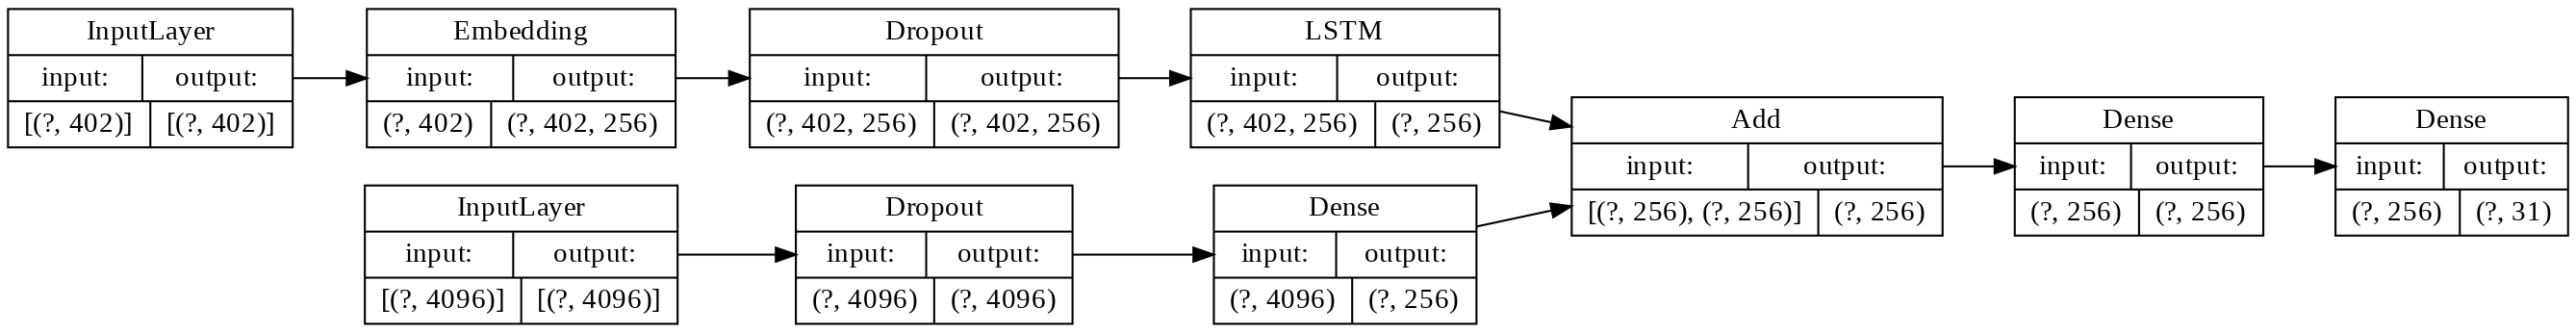

In [ ]:
from tensorflow.keras.layers import Input , LSTM , Embedding,Dense,Dropout,add
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

input1 = Input(shape=(max_length,))
embedding = Embedding(vocab_size,256,mask_zero=False)(input1)
drop = Dropout(0.5)(embedding)
lstm = LSTM(256)(drop)

input2 = Input(shape=(4096,))
drop2 = Dropout(0.5)(input2)
dense = Dense(256, activation='relu')(drop2)

decode = add([dense,lstm])
decode = Dense(256,activation='relu')(decode)

output = Dense(vocab_size,activation='softmax')(decode)

model = Model(inputs=[input1,input2], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()
tf.keras.utils.plot_model(model, "my_first_model.png",show_shapes=True,show_layer_names=False,dpi=150,expand_nested=False,rankdir='LR')

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 1.1518 - accuracy: 0.6583
 ['> a metal cart with a red awning is pedaled down a street transporting a figure in blue clothes whose head is slumped against their chest <', '> there is a teenage boy sitting in what appears to be some kind of rickshaw while the driver points to him from behind <', '> a man wearing blue is being transported by a bicycle taxi <', '> a man in a blue shirt getting carted around on a street <', '> a young man riding in a pedicycle <']
[ 2 10  5  3  8 23 13 11  7 17] [9.98991191e-01 5.29490353e-04 2.23858253e-04 7.22062250e-05
 7.11605680e-05 3.86781867e-05 1.69354025e-05 1.15410785e-05
 8.20539663e-06 7.19957052e-06]
 


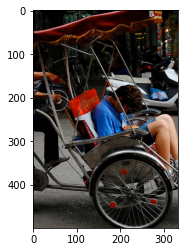

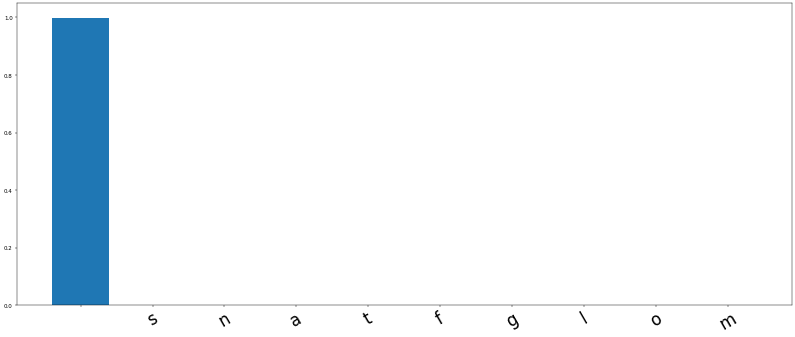

[ 3  7 12 15  8 17  4 11 19 22] [0.47391295 0.11868364 0.06194333 0.05027155 0.04088934 0.0369287
 0.03585285 0.02758926 0.0247641  0.0246509 ]
a


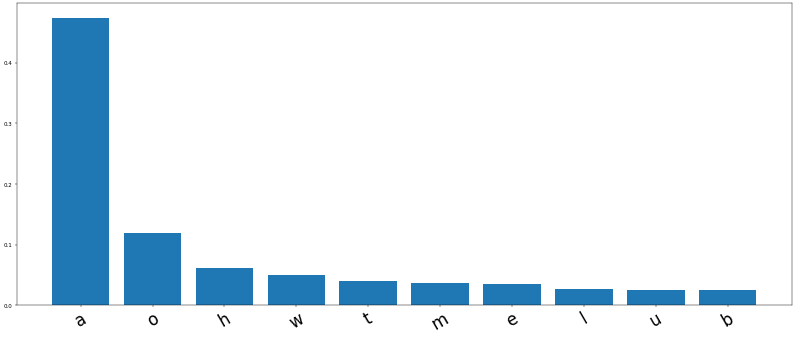

[ 5  9 10  8 16 26  2 18 17 23] [0.43360835 0.26226902 0.09220514 0.06897192 0.02239326 0.01833117
 0.01617394 0.01548183 0.01492077 0.01242027]
n


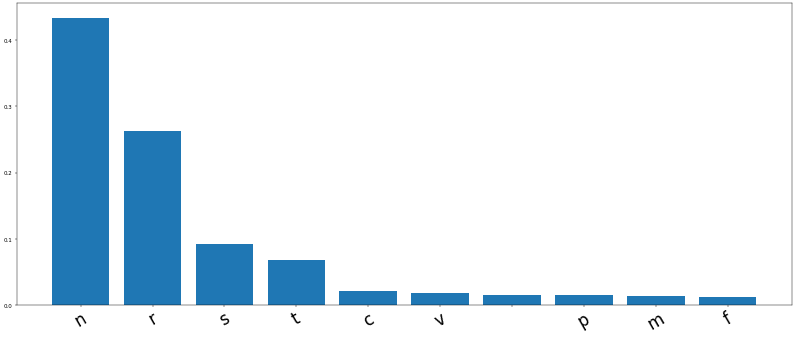

[ 4  7  3  6 19 25 16  2 15 26] [0.38345838 0.21439306 0.17869487 0.15274712 0.06047159 0.00221255
 0.00142992 0.00100305 0.00090851 0.00069473]
e


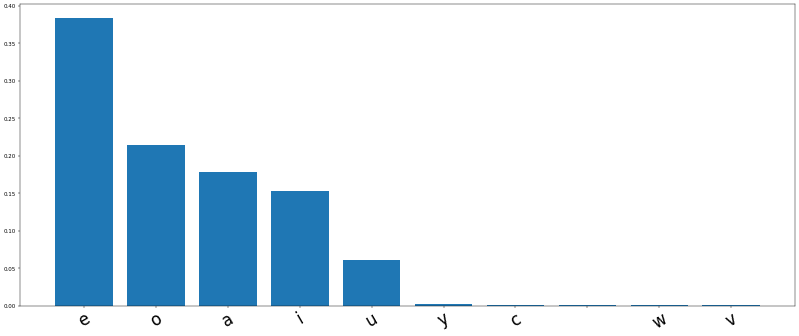

[17 26 28  3  5 16 14 11 30  8] [0.17836902 0.15137582 0.14974803 0.11761009 0.08054072 0.04289431
 0.04042028 0.03903715 0.0345888  0.029701  ]
m


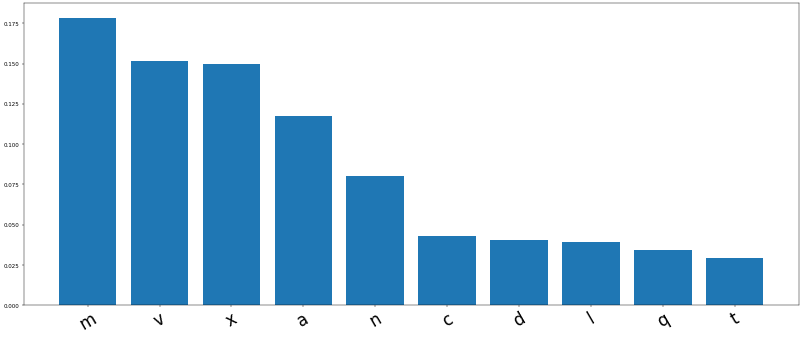

[ 3 19  7  6  4 25  9 11 18 15] [0.74039507 0.08256488 0.05899354 0.05821967 0.04681846 0.00242368
 0.00234307 0.00162925 0.00140108 0.0012197 ]
a


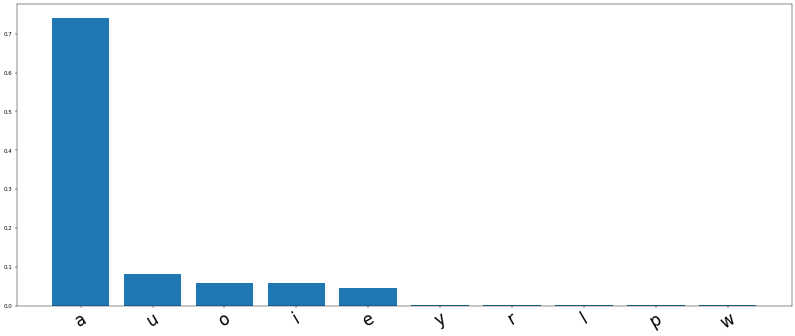

[ 9  8  5 16 24 10 26 18 14  2] [0.30831903 0.25983742 0.22816175 0.04862544 0.0235986  0.02234225
 0.01745918 0.01674691 0.01344763 0.01311458]
r


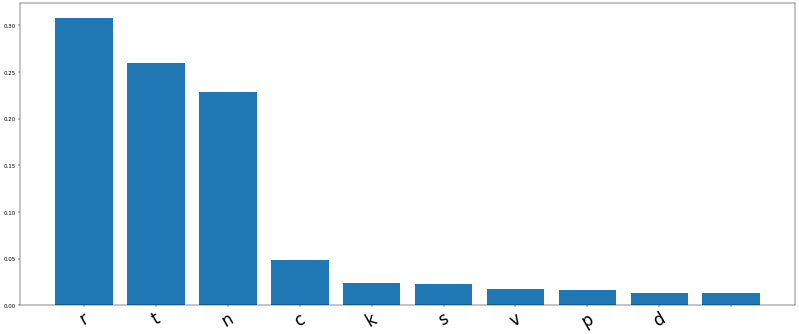

[ 3  6  4  7 19  9 25 11  5 18] [0.23837806 0.22331603 0.21410173 0.20284465 0.09724787 0.00921337
 0.00691527 0.00253912 0.00158149 0.00072187]
a


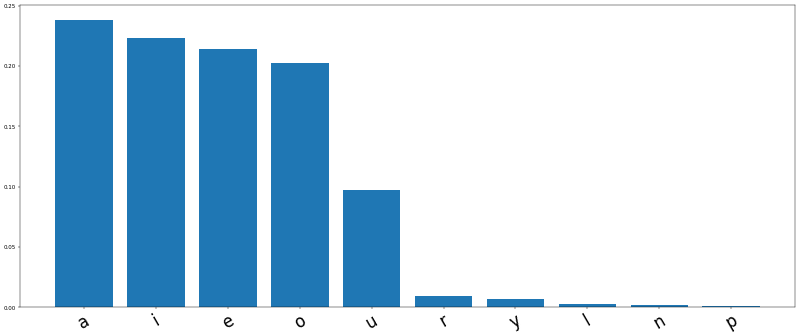

[ 5  2  8  9 14 10  6 16 22 17] [0.33695397 0.18294051 0.09172678 0.07413851 0.04693764 0.04663717
 0.03751684 0.03229742 0.03211502 0.03025432]
n


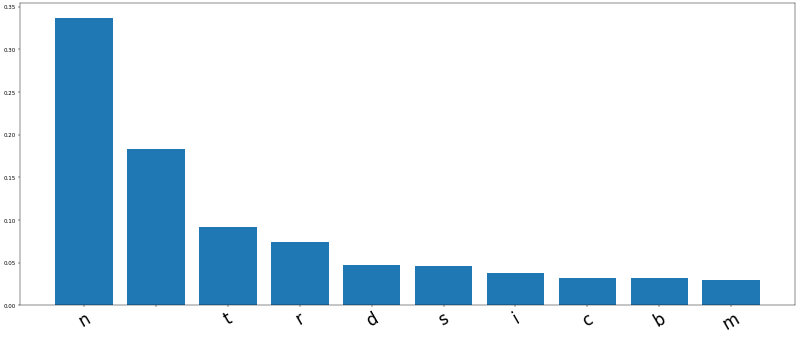

[ 4  7  3  6 19 25  9 26 28  5] [0.3529107  0.21777037 0.18212801 0.13224533 0.09606469 0.00516874
 0.00201832 0.00149419 0.00135854 0.00118814]
e


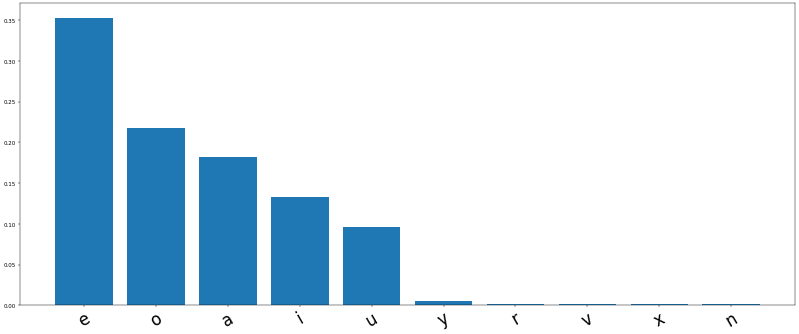

[ 3 17 28 26  5 18  8 16 14 30] [0.1845821  0.1303671  0.08921798 0.08855849 0.08432064 0.05088593
 0.04649318 0.04644799 0.03912608 0.03795369]
a


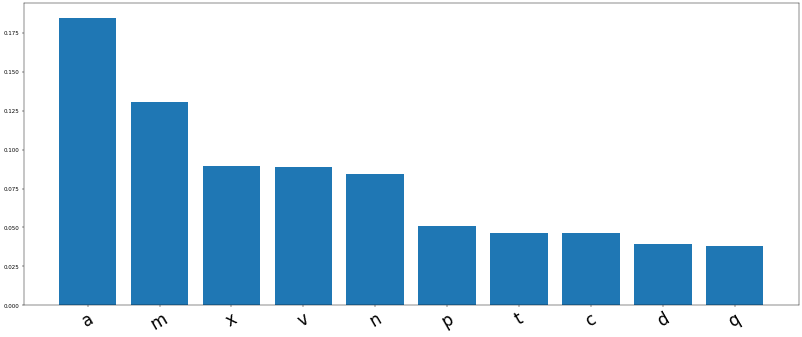

[ 5  9  2  8  6 10 16 11 22 17] [0.397579   0.18180989 0.10890561 0.05071828 0.05010281 0.03130785
 0.02755992 0.02185713 0.0203667  0.01873005]
n


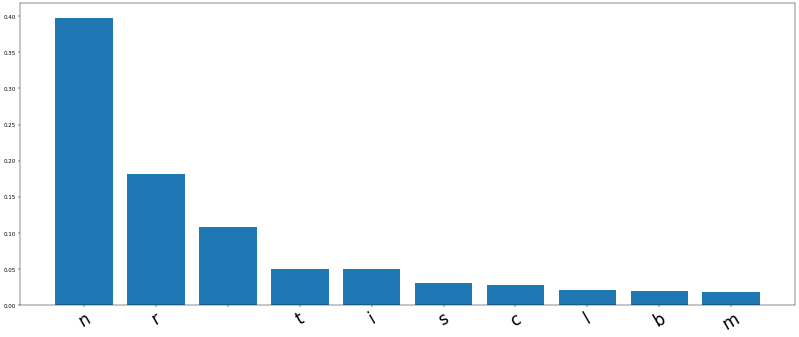

[ 4  7  3  6 19 25 26  9 16 28] [0.3023914  0.25022253 0.16809186 0.14332016 0.11588208 0.00471576
 0.00205899 0.00198182 0.00167752 0.00142654]
e


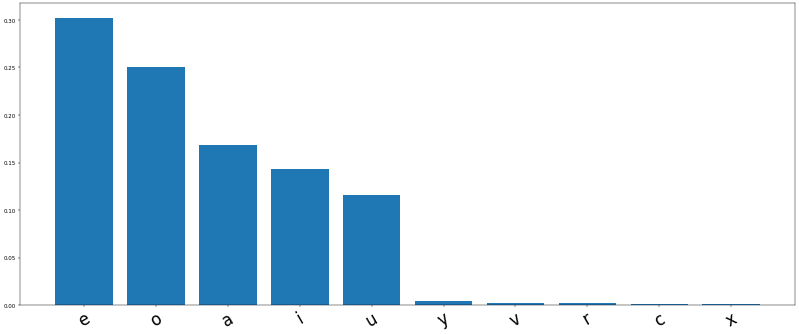

[ 3 17 28 26  5  8 18 16 14 11] [0.18387507 0.12105931 0.09129953 0.09038039 0.08235317 0.05021063
 0.04920808 0.04591862 0.04180672 0.03802861]
a


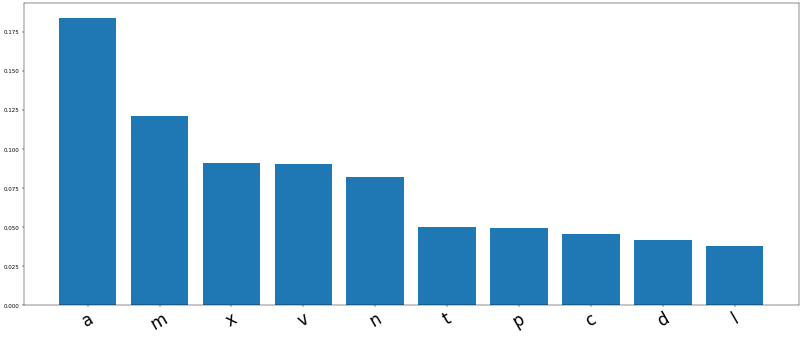

[ 5  9  2  8  6 10 16 11 17 18] [0.40900415 0.17368482 0.09895927 0.05403841 0.05030621 0.03335305
 0.0291115  0.0203692  0.01954068 0.01937439]
n


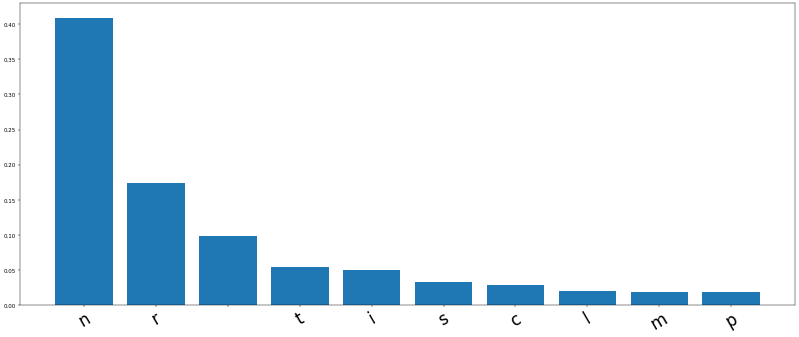

[ 4  7  3  6 19 25 26  9 16 28] [0.3035809  0.25314555 0.16516642 0.1432944  0.11456537 0.00466999
 0.00214467 0.00198562 0.00167778 0.0014564 ]
e


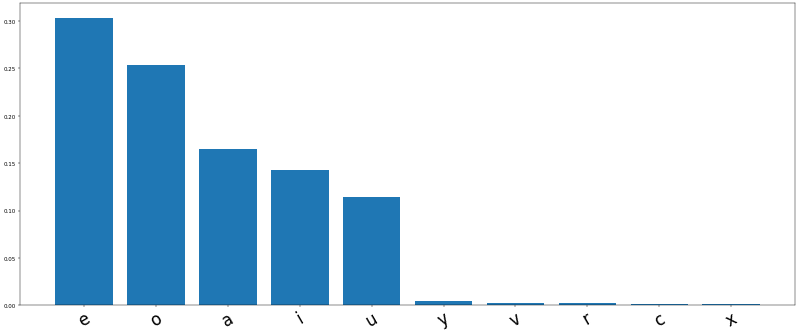

[ 3 17 28 26  5  8 18 16 14 11] [0.1836329  0.11995551 0.09064045 0.09038745 0.08236428 0.0523067
 0.04921392 0.04626636 0.04186852 0.03812133]
a


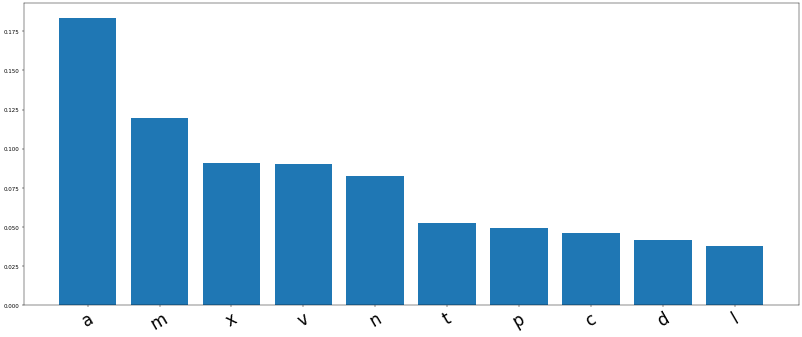

[ 5  9  2  8  6 10 16 11 17 18] [0.4105395  0.17337394 0.09872202 0.0543246  0.05003284 0.03343805
 0.02924392 0.02000441 0.01945707 0.01936277]
n


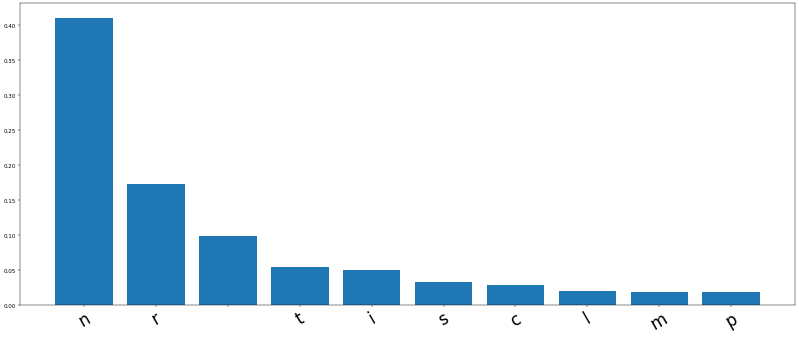

[ 4  7  3  6 19 25 26  9 16 28] [0.30332297 0.25348902 0.16519265 0.14313701 0.11462037 0.00465615
 0.002153   0.00198823 0.00167556 0.00146201]
e


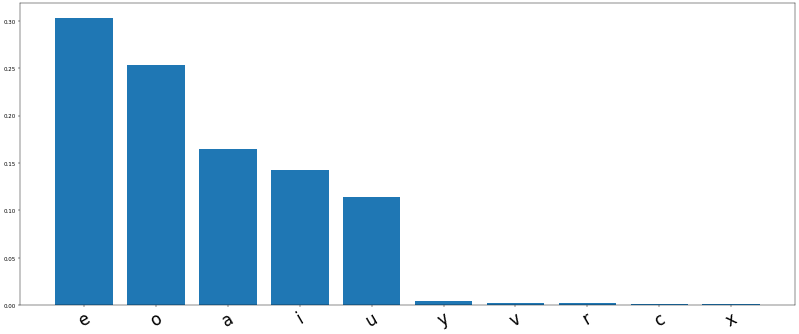

[ 3 17 28 26  5  8 18 16 14 11] [0.18362126 0.1198596  0.09070574 0.09036408 0.08235765 0.0524029
 0.04924953 0.04625458 0.04184731 0.03812535]
a


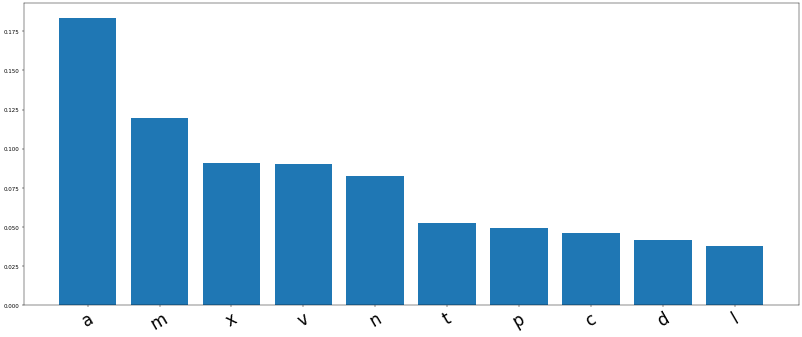

[ 5  9  2  8  6 10 16 11 17 18] [0.41039947 0.17358665 0.09865879 0.05434762 0.05004614 0.03344896
 0.02923749 0.01999066 0.01945184 0.01936478]
n


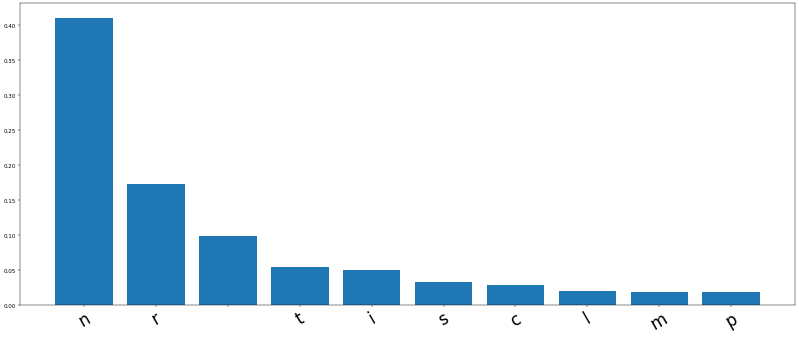

[ 4  7  3  6 19 25 26  9 16 28] [0.3033997  0.25346175 0.16523373 0.14307356 0.11459769 0.00465587
 0.00215292 0.00198753 0.001675   0.00146284]
e


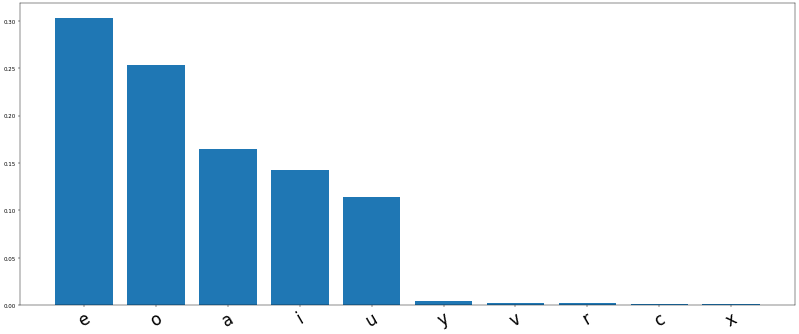

[ 3 17 28 26  5  8 18 16 14 11] [0.18360278 0.11985947 0.09072711 0.09036313 0.08236166 0.05239702
 0.04925549 0.04624702 0.04184645 0.03812352]
a


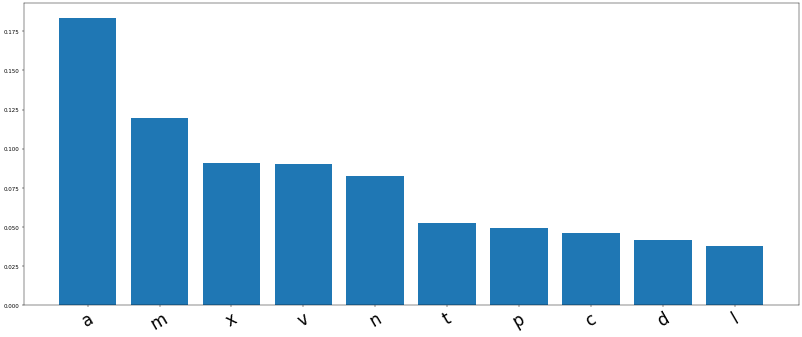

[ 5  9  2  8  6 10 16 11 17 18] [0.41032758 0.17364863 0.09865068 0.05435174 0.05005181 0.03345318
 0.02923463 0.01999382 0.01945096 0.01936659]
n


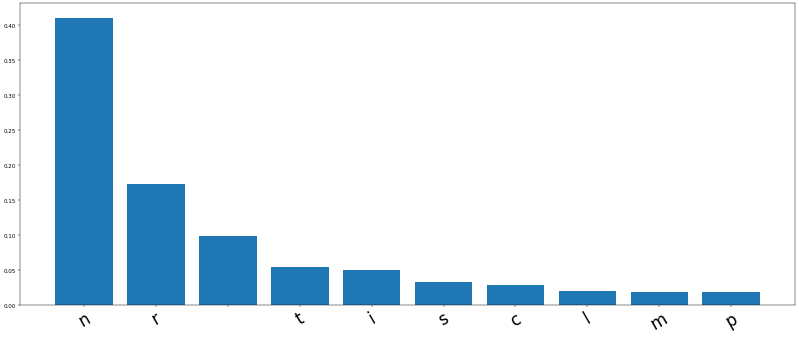

[ 4  7  3  6 19 25 26  9 16 28] [0.30343422 0.25344187 0.16524285 0.14306094 0.11458705 0.00465605
 0.00215284 0.00198717 0.00167498 0.00146309]
e


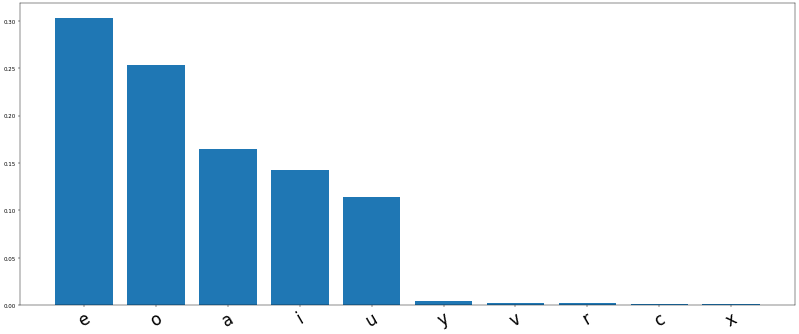

[ 3 17 28 26  5  8 18 16 14 11] [0.18359056 0.119859   0.09073397 0.0903672  0.08236295 0.05239369
 0.04925668 0.04624509 0.04184783 0.03812358]
a


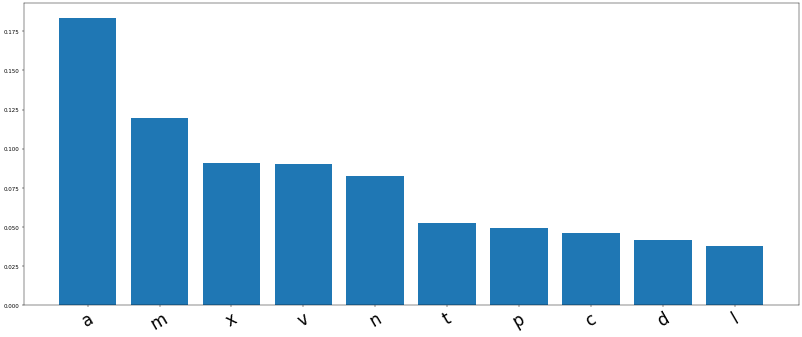

[ 5  9  2  8  6 10 16 11 17 18] [0.41029567 0.17366758 0.09865411 0.0543531  0.05005294 0.03345491
 0.02923417 0.01999587 0.01945022 0.0193676 ]
n


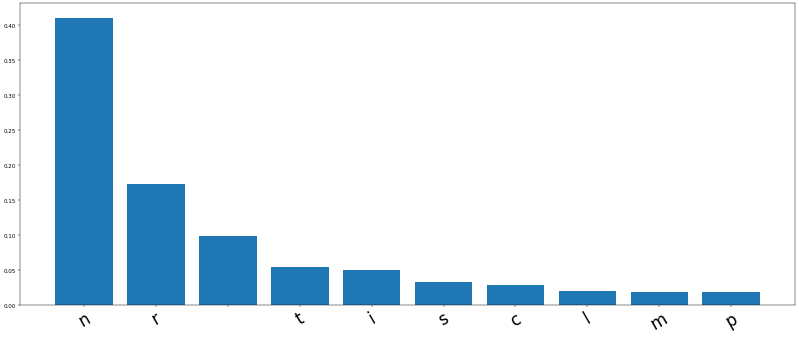

[ 4  7  3  6 19 25 26  9 16 28] [0.30344847 0.2534331  0.16524394 0.14305814 0.11458321 0.00465611
 0.00215284 0.00198701 0.00167504 0.0014632 ]
e


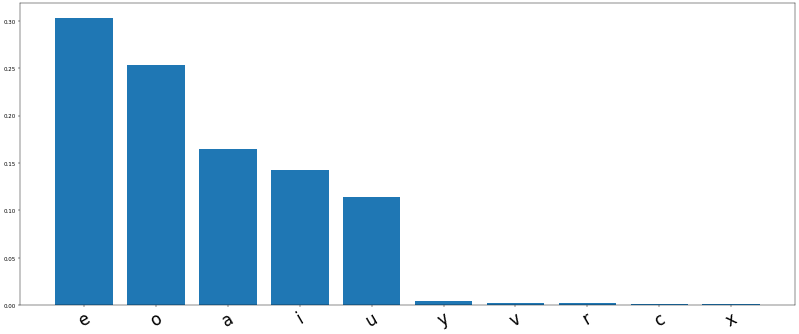

[ 3 17 28 26  5  8 18 16 14 11] [0.18358459 0.11985797 0.09073649 0.09036997 0.08236337 0.05239255
 0.04925709 0.04624461 0.04184866 0.03812389]
a


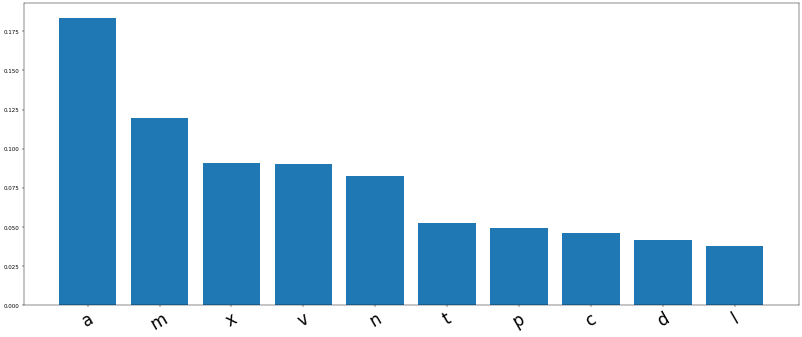

[ 5  9  2  8  6 10 16 11 17 18] [0.41028076 0.1736748  0.09865704 0.05435368 0.05005326 0.03345567
 0.02923416 0.01999686 0.01944976 0.01936813]
n


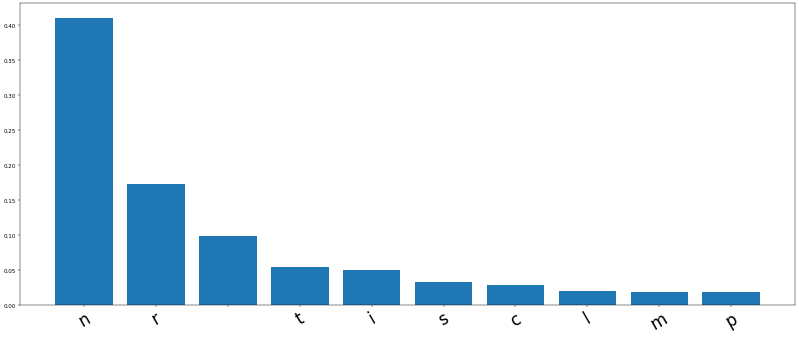


 >   a n e m a r a n e a n e a n e a n e a n e a n e a n e a n
10/10 [==============================] - 27s 3s/step - loss: 1.1518 - accuracy: 0.6583
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 1.1096 - accuracy: 0.6619
 ['> young man shows his tongue piercing while a woman stands next to him <', '> a man sticks his tongue out at the camera a woman smirks at it <', '> a man shows off his tongue ring while posing with a girl <', '> the man and woman are sitting together and smiling <', '> man with a pierced tongue next to a woman <']
[ 2 10  5  8  3 23 11 13  7  4] [9.9898821e-01 4.6556434e-04 2.7173682e-04 7.9447964e-05 7.5750308e-05
 4.8533715e-05 1.5202410e-05 1.1761872e-05 7.9401725e-06 7.0630986e-06]
 


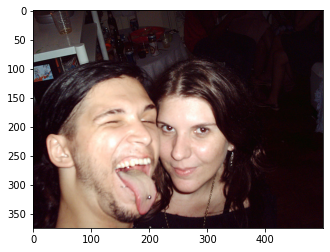

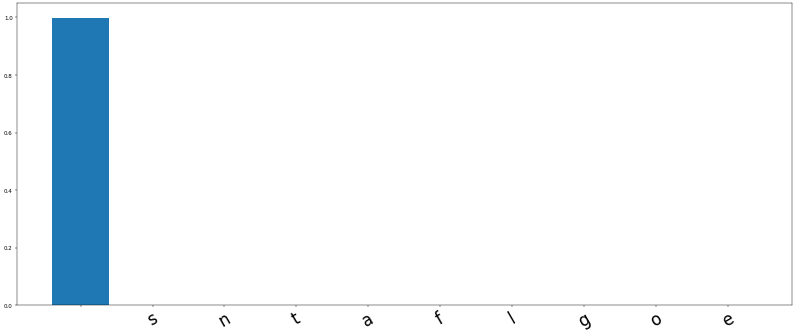

[ 3  7 15 12 17 11  8  4 22 16] [0.34195212 0.18032049 0.0712828  0.07012804 0.05564767 0.05222797
 0.03790215 0.03035207 0.02791472 0.0209853 ]
a


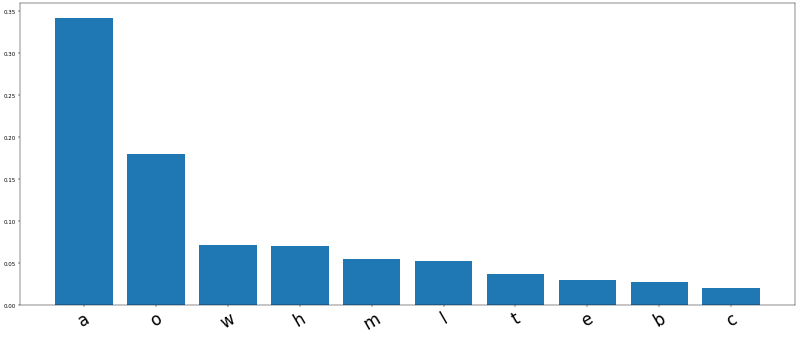

[ 5  9 10  8 16 17 26  2 11 23] [0.501516   0.13970503 0.09986151 0.09499475 0.02822343 0.02007885
 0.01816782 0.01804296 0.01684678 0.01352413]
n


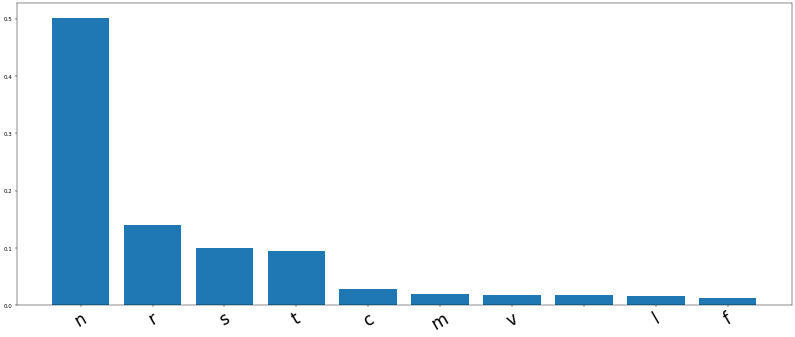

[ 4  7  3  6 19 25 16 15  2 26] [0.3700232  0.24319267 0.19428742 0.14109305 0.04190122 0.00190262
 0.00119536 0.00090336 0.00088709 0.00065315]
e


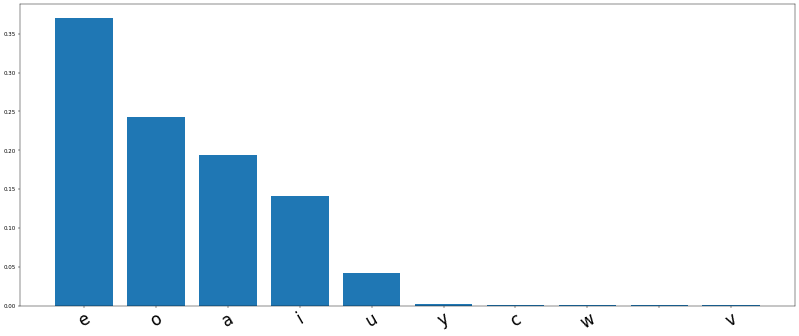

[17 26 28  3 11  5  8 16 14 30] [0.2456213  0.11525526 0.11074647 0.08633488 0.07698651 0.07353029
 0.06249775 0.04320573 0.03978281 0.02694463]
m


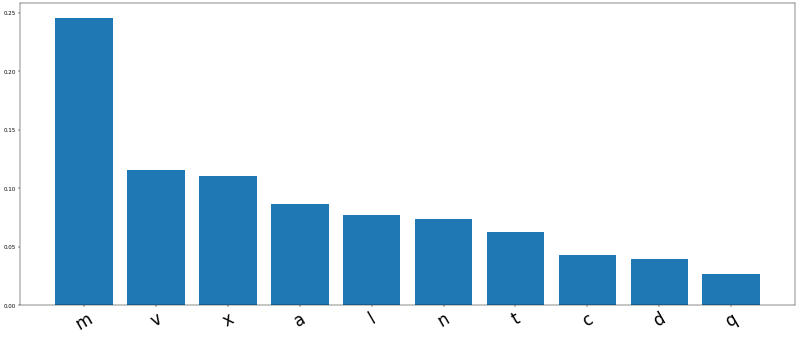

[ 3  7  4 19  6 11 25  9 15 18] [8.8614786e-01 3.6170796e-02 2.6626511e-02 2.4128228e-02 2.0232044e-02
 1.7982440e-03 1.0781306e-03 1.0199785e-03 6.7573774e-04 3.9069692e-04]
a


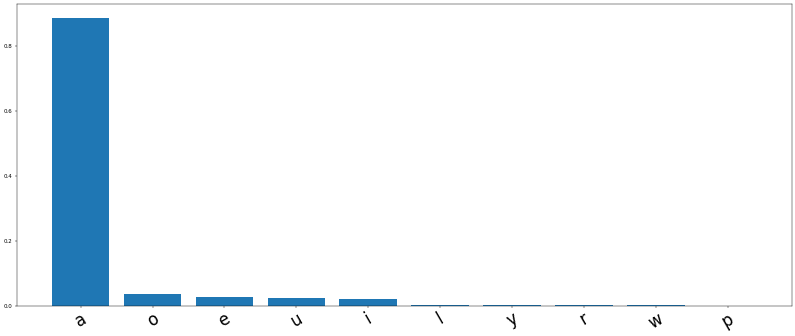

[ 8  9  5 16 24 10 26 14  2 18] [0.36275136 0.22714676 0.19163385 0.05064787 0.03145478 0.0294268
 0.0142838  0.01397193 0.01330629 0.01312621]
t


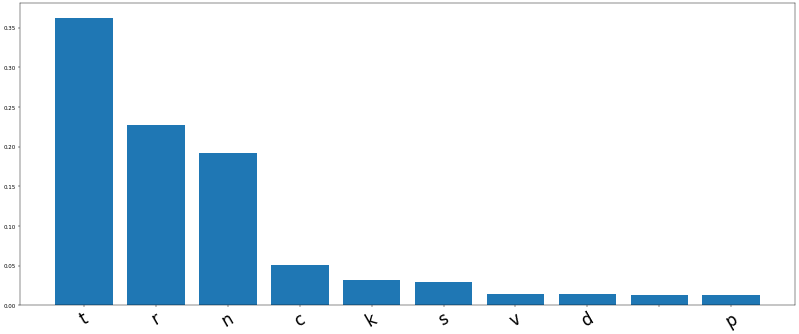

[ 9  3  4  7  6 19 12 25 11 15] [0.47687772 0.23912476 0.06255002 0.05934379 0.04866776 0.04809767
 0.02882264 0.01127361 0.00868417 0.00743957]
r


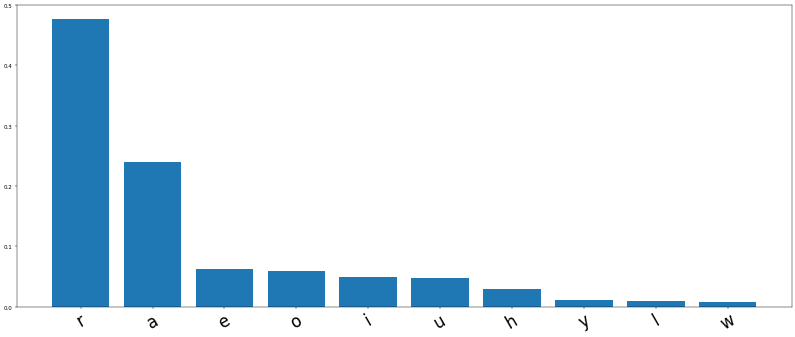

[ 3  6  7  4 19 11 25  5 14 16] [0.28159842 0.22731893 0.21794246 0.14835477 0.09453321 0.0061963
 0.00535552 0.00380954 0.0022119  0.00203408]
a


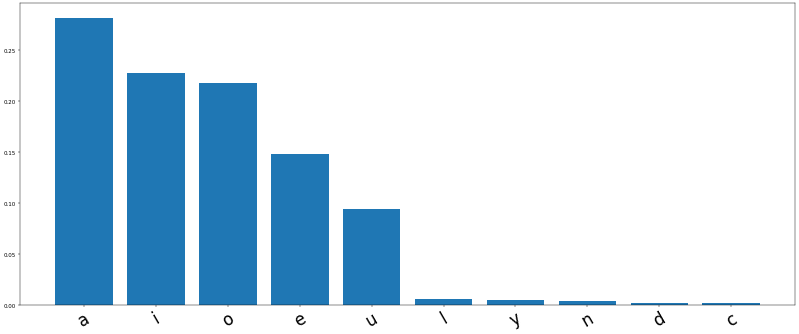

[ 5  2  8 10  9 16  6 14 22 17] [0.45466763 0.12968609 0.12552884 0.04795851 0.03768886 0.03119559
 0.02794231 0.02405329 0.02397025 0.01941546]
n


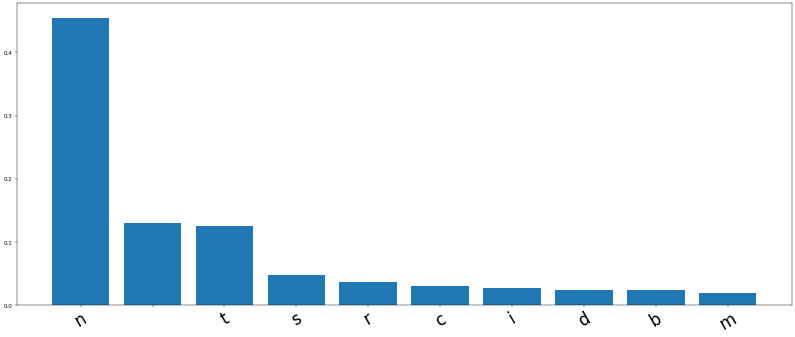

[ 4  3  7  6 19 25  5 26 16  9] [0.41590998 0.18794076 0.16605371 0.14855585 0.06357879 0.00431189
 0.00165472 0.00137893 0.00131174 0.00127574]
e


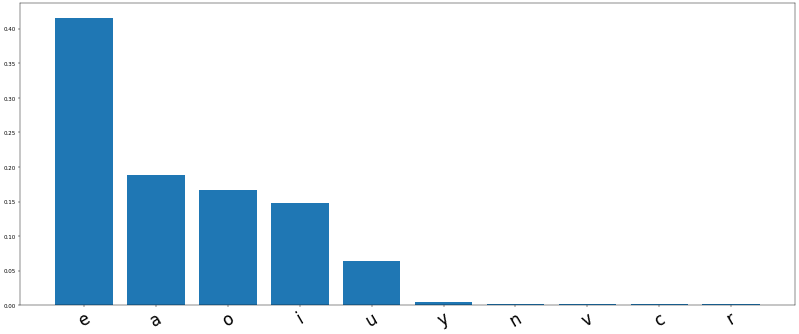

[17  3  5  8 28 26 16 18 11 30] [0.15450889 0.14768997 0.08991368 0.08710551 0.07692374 0.07442301
 0.05060914 0.05023605 0.04157907 0.0381455 ]
m


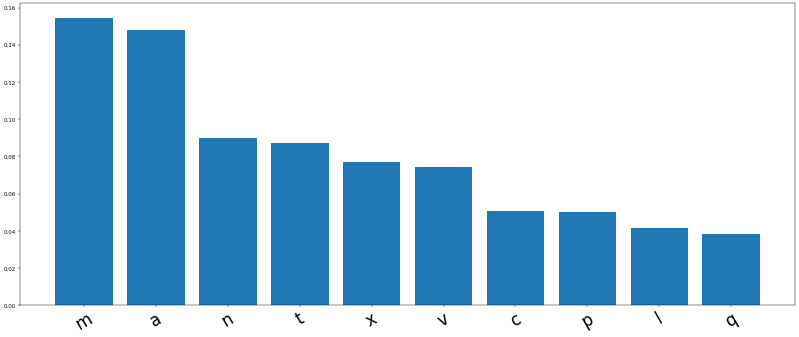

[ 3  7  6 19  4 25  9 18 22  5] [0.4317587  0.21663894 0.17030463 0.08380194 0.06760454 0.00488254
 0.00387535 0.00380125 0.00371127 0.00206902]
a


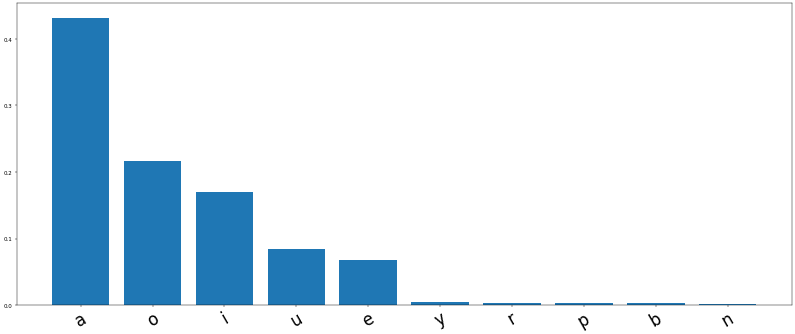

[ 8  5  9 16  2 10 11 24  6 17] [0.4122559  0.20830548 0.15123343 0.05046931 0.0266523  0.01895122
 0.0178226  0.01725219 0.01672365 0.01344749]
t


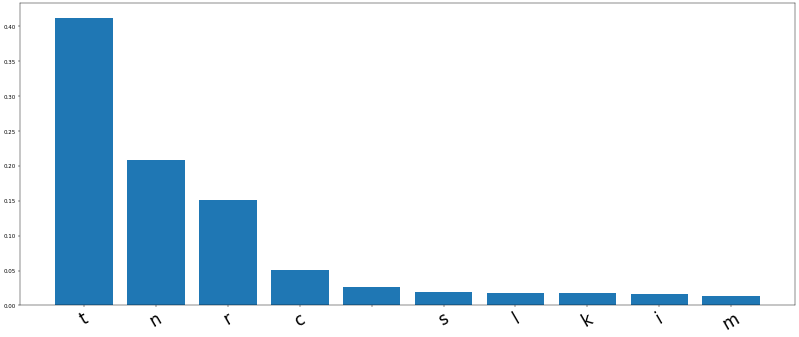

[ 9  3  7  4  6 19 12 25 11 15] [0.47464517 0.22108616 0.08649738 0.0507407  0.04938031 0.0425505
 0.03756738 0.01034226 0.00997506 0.00700292]
r


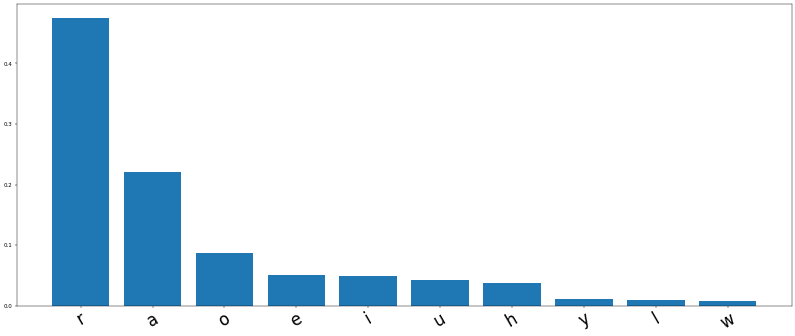

[ 7  6  3  4 19  5 25 11 14 16] [0.3144973  0.21617761 0.20718317 0.16546135 0.07182027 0.00421467
 0.00403751 0.00381075 0.00200796 0.0019947 ]
o


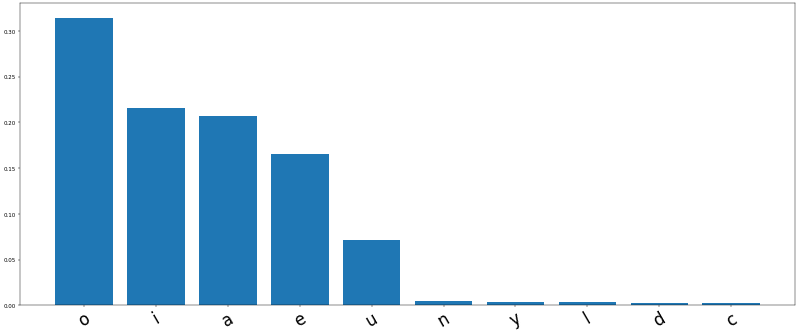

[ 5 23  8 16 26 19 22 18  9 10] [0.33766237 0.22673169 0.09825817 0.09279793 0.05857006 0.04272676
 0.03681739 0.03047045 0.0184652  0.01203058]
n


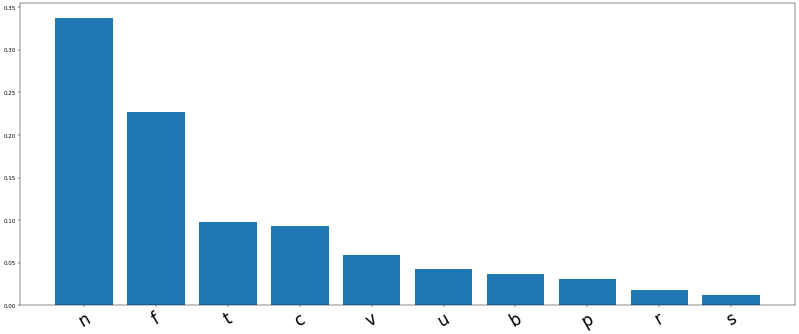

[ 4  6  3 19  7 16  5 26 25 18] [0.5692157  0.12793504 0.12759098 0.07932883 0.07775165 0.00461659
 0.0027959  0.00154121 0.00147943 0.00124022]
e


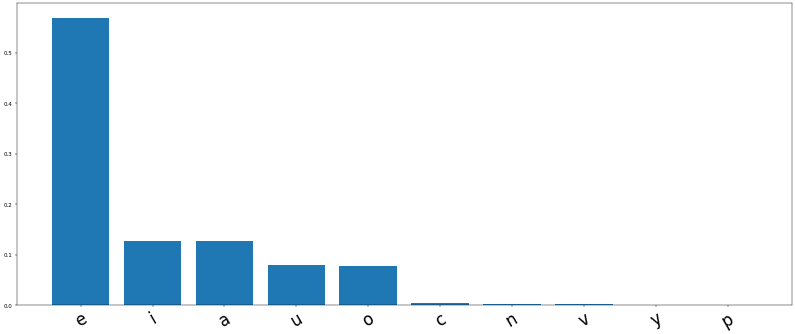

[17  3  8 26 28  5 16 30 18 14] [0.15210597 0.14826378 0.09798405 0.08259974 0.08130103 0.07434766
 0.05462243 0.05186227 0.04522214 0.03050992]
m


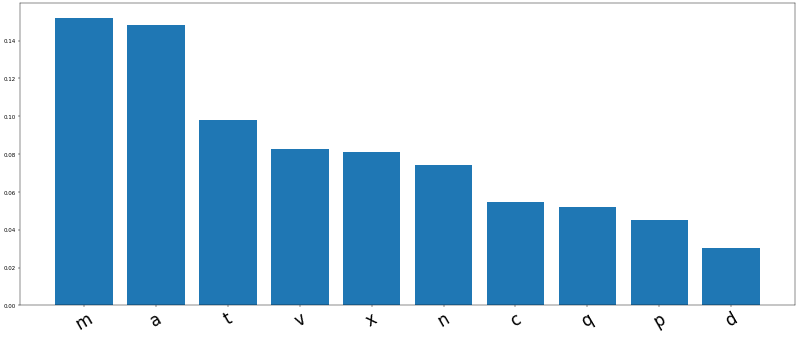

[ 3  7  6 19  4 18  9 22 25  5] [0.3595956  0.2424034  0.17406173 0.09840017 0.09209082 0.00469738
 0.00357188 0.0035527  0.0034097  0.00302769]
a


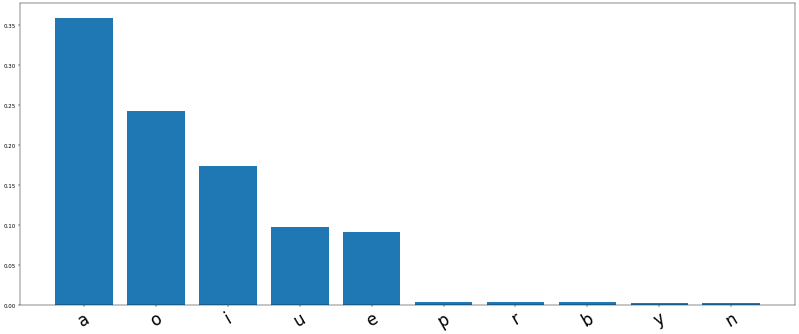

KeyboardInterrupt: ignored

In [ ]:
model.fit(generator,steps_per_epoch=10,epochs = 100,callbacks=[LambdaCallback(on_epoch_end=test_model)])

## Image to Caption with Attention 